In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import itertools
import seaborn as sns
from tqdm.notebook import tqdm

In [340]:
df = pd.read_csv("./results.csv")
df = df.sort_values(["instance","solver"])

df = df.drop("Unnamed: 0", axis=1)
for col in ["solver","instance"]:
    df = df[[col] + [v for v in df.columns if v != col]]


In [341]:
display(df.head(5))
display(df["solver"].unique())
display(df["instance"].unique())

,instance,solver,run,seed,HV,HVN,SP,ABSE.HV.MEAN,ABSE.HV.AUC.MEAN,ABSE.HV.AUC.B1,ABSE.CUM.HV.MEAN,ABSE.CUM.HV.AUC.MEAN,ABSE.CUM.HV.AUC.B1,ABSE.JF.HV.MEAN,ABSE.JF.HV.AUC.MEAN,ABSE.JF.HV.AUC.B1,ABSE.JF.CUM.HV.MEAN,ABSE.JF.CUM.HV.AUC.MEAN,ABSE.JF.CUM.HV.AUC.B1,configuration
49,BiObjBBOB1,MOLE,0.0,2733.0,422.539806,0.435575,2.161855,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,105.634951,4.016938e+05,2.112699e+04,414.062848,2.205512e+07,2.112699e+04,NaN
76,BiObjBBOB1,NSGA-II,0.0,2733.0,978.269291,1.008449,1.982477,455.888163,4.509834e+07,8.300774e+07,464.671710,4.588747e+07,8.358580e+07,244.567323,2.464981e+07,9.710786e+07,610.186273,6.057618e+07,9.759838e+07,NaN
89,BiObjBBOB1,SMS-EMOA,0.0,2733.0,984.034648,1.014392,2.468993,475.795989,4.563235e+07,8.338847e+07,493.210290,4.751933e+07,8.475113e+07,246.008662,2.606331e+07,9.692151e+07,591.754737,5.856264e+07,9.708670e+07,NaN
111,BiObjBBOB1,omnioptimizer,0.0,2733.0,7963.289993,8.208958,1.983432,5905.671150,5.864980e+08,7.775372e+08,5911.426964,5.870584e+08,7.777188e+08,1990.822498,2.178632e+08,7.949364e+08,7952.157326,7.933756e+08,7.950906e+08,NaN
55,BiObjBBOB2,MOLE,0.0,2733.0,0.000000,0.000000,1.000510,0.000000,1.472149e+06,0.000000e+00,186.482767,1.141996e+07,0.000000e+00,0.000000,2.288574e+06,7.779380e+06,684.289561,2.507791e+07,6.427810e+07,NaN


array(['MOLE', 'NSGA-II', 'SMS-EMOA', 'omnioptimizer'], dtype=object)

array(['BiObjBBOB1', 'BiObjBBOB2', 'BiObjBBOB3', 'BiObjBBOB4',
       'BiObjBBOB5', 'DTLZ1', 'DTLZ2', 'DTLZ3', 'DTLZ4', 'DTLZ5', 'DTLZ6',
       'DTLZ7', 'MMF1', 'MMF10', 'MMF11', 'MMF12', 'MMF14', 'MMF14a',
       'MMF15', 'MMF15a', 'MMF1e', 'MMF1z', 'MMF2', 'MMF3', 'MMF4',
       'MMF5', 'MMF6', 'MMF7', 'MMF8', 'MMF9', 'ZDT1', 'ZDT2', 'ZDT3',
       'ZDT4', 'ZDT6'], dtype=object)

In [342]:
df[df["solver"] == "omnioptimizer"]

,instance,solver,run,seed,HV,HVN,SP,ABSE.HV.MEAN,ABSE.HV.AUC.MEAN,ABSE.HV.AUC.B1,ABSE.CUM.HV.MEAN,ABSE.CUM.HV.AUC.MEAN,ABSE.CUM.HV.AUC.B1,ABSE.JF.HV.MEAN,ABSE.JF.HV.AUC.MEAN,ABSE.JF.HV.AUC.B1,ABSE.JF.CUM.HV.MEAN,ABSE.JF.CUM.HV.AUC.MEAN,ABSE.JF.CUM.HV.AUC.B1,configuration
111,BiObjBBOB1,omnioptimizer,0.0,2733.0,7963.289993,8.208958,1.983432,5905.671150,5.864980e+08,7.775372e+08,5911.426964,5.870584e+08,7.777188e+08,1990.822498,2.178632e+08,7.949364e+08,7952.157326,7.933756e+08,7.950906e+08,NaN
10,BiObjBBOB2,omnioptimizer,0.0,2733.0,10698.060749,8.027908,3.770160,10210.348845,1.018380e+09,9.905457e+08,10249.388489,1.022040e+09,9.922375e+08,2674.515187,3.776760e+08,1.069210e+09,10605.312977,1.059440e+09,1.071916e+09,NaN
113,BiObjBBOB3,omnioptimizer,0.0,2733.0,1517.082090,15.751420,3.129886,1418.617909,1.417097e+08,1.329586e+08,1434.431852,1.432270e+08,1.331036e+08,379.270522,3.836991e+07,1.516110e+08,1123.021962,1.119982e+08,1.536454e+08,NaN
120,BiObjBBOB4,omnioptimizer,0.0,2733.0,0.000000,0.000000,4.625419,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
19,BiObjBBOB5,omnioptimizer,0.0,2733.0,55.729139,0.142080,2.293290,23.911418,2.409780e+06,3.986613e+06,44.893228,4.484201e+06,4.396201e+06,13.932285,1.420325e+06,5.600560e+06,52.727853,5.267002e+06,6.567601e+06,NaN
30,DTLZ1,omnioptimizer,0.0,2733.0,115.503670,0.955975,1.499987,28.875918,2.945754e+06,1.153775e+07,114.754832,1.146389e+07,1.155847e+07,28.875918,2.959904e+06,1.153775e+07,116.277963,1.161597e+07,1.155847e+07,NaN
69,DTLZ2,omnioptimizer,0.0,2733.0,115.929246,0.964359,1.505423,28.969796,2.894908e+06,1.157963e+07,30.176048,3.014478e+06,1.205791e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
68,DTLZ3,omnioptimizer,0.0,2733.0,115.500337,0.963398,1.499987,28.875084,2.989170e+06,1.153830e+07,114.810723,1.146946e+07,1.155791e+07,28.875084,3.011759e+06,1.153830e+07,116.451956,1.163328e+07,1.155791e+07,NaN
95,DTLZ4,omnioptimizer,0.0,2733.0,115.871080,0.964148,1.486987,28.918473,2.890127e+06,1.156051e+07,30.223449,3.019313e+06,1.207725e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN
71,DTLZ5,omnioptimizer,0.0,2733.0,115.929246,0.964359,1.505423,28.969796,2.894908e+06,1.157963e+07,30.176048,3.014478e+06,1.205791e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,NaN


In [343]:
df.groupby(["solver","instance"]).size().unstack("solver")

solver,MOLE,NSGA-II,SMS-EMOA,omnioptimizer
instance,,,,
BiObjBBOB1,1.0,1.0,1.0,1.0
BiObjBBOB2,1.0,1.0,1.0,1.0
BiObjBBOB3,NaN,1.0,1.0,1.0
BiObjBBOB4,1.0,1.0,1.0,1.0
BiObjBBOB5,1.0,1.0,1.0,1.0
DTLZ1,NaN,1.0,1.0,1.0
DTLZ2,1.0,1.0,1.0,1.0
DTLZ3,NaN,1.0,1.0,1.0
DTLZ4,NaN,1.0,1.0,1.0


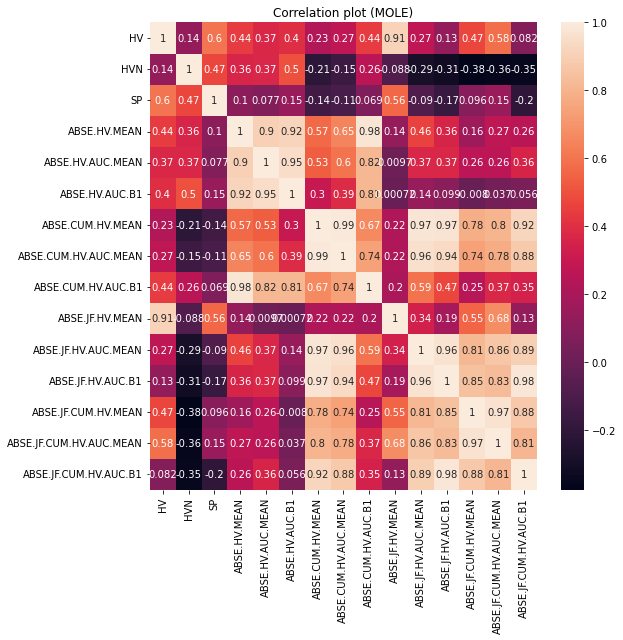

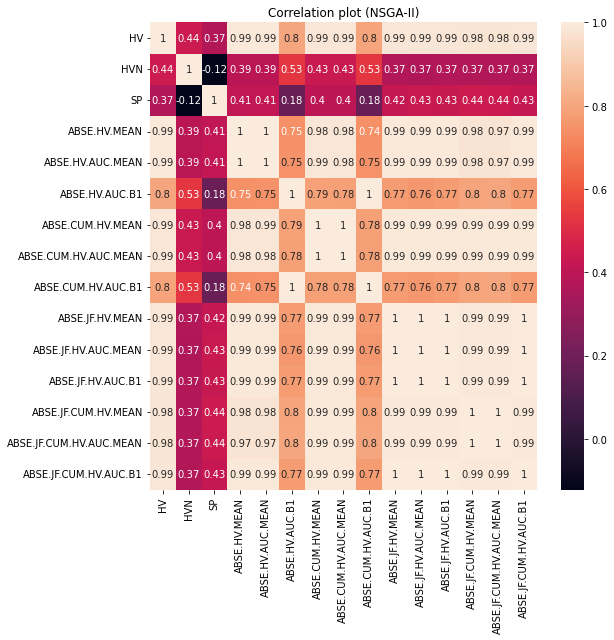

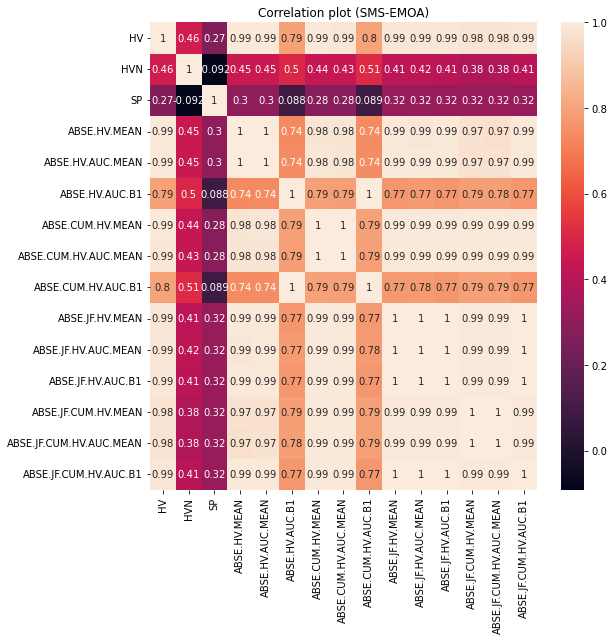

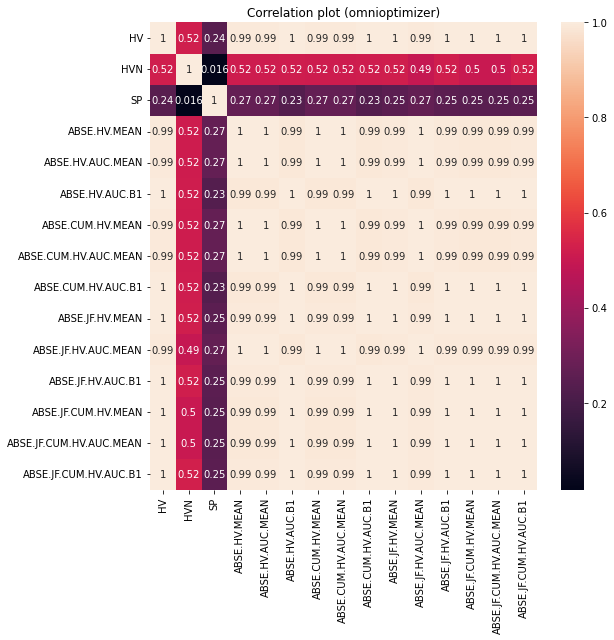

In [322]:
for solver, gdf in df.groupby("solver"):
    metrics = gdf.columns[~gdf.columns.isin(["run", "seed", "Unnamed: 0", "solver", "instance", "configuration"])]
    fig, ax = plt.subplots(1, figsize=(9,9))
    ax.set_aspect('auto')
    sns.heatmap(gdf[metrics].corr(), annot = True)
    ax.set_title(f"Correlation plot ({solver})")
    plt.tight_layout()
    plt.savefig(f"figures/correlations_{solver}.pdf")

In [323]:
for solver, gdf in df.groupby("solver"):
    gdf = gdf[gdf["HV"] == 0]
    if len(gdf) == 0:
        continue
    print(solver)
    display(gdf)

MOLE


,Unnamed: 0,run,seed,HV,HVN,SP,ABSE.HV.MEAN,ABSE.HV.AUC.MEAN,ABSE.HV.AUC.B1,ABSE.CUM.HV.MEAN,...,ABSE.CUM.HV.AUC.B1,ABSE.JF.HV.MEAN,ABSE.JF.HV.AUC.MEAN,ABSE.JF.HV.AUC.B1,ABSE.JF.CUM.HV.MEAN,ABSE.JF.CUM.HV.AUC.MEAN,ABSE.JF.CUM.HV.AUC.B1,solver,instance,configuration
55,55,0.0,2733.0,0.0,0.0,1.000510,0.0,1.472149e+06,0.00000,186.482767,...,0.00000,0.0,2.288574e+06,7.779380e+06,684.289561,2.507791e+07,6.427810e+07,MOLE,BiObjBBOB2,NaN
16,16,0.0,2733.0,0.0,0.0,1.033338,0.0,0.000000e+00,0.00000,0.000000,...,0.00000,0.0,1.863782e+05,0.000000e+00,59.094478,5.119619e+06,0.000000e+00,MOLE,BiObjBBOB5,NaN
15,15,0.0,2733.0,0.0,0.0,1.003952,0.0,2.948380e+02,115.54091,0.057204,...,2958.42483,0.0,3.122865e+02,1.148994e+03,0.054050,5.090169e+03,1.581149e+04,MOLE,MMF12,NaN
116,116,0.0,2733.0,0.0,0.0,1.049176,0.0,0.000000e+00,0.00000,0.000000,...,0.00000,0.0,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,MOLE,MMF1e,NaN


omnioptimizer


,Unnamed: 0,run,seed,HV,HVN,SP,ABSE.HV.MEAN,ABSE.HV.AUC.MEAN,ABSE.HV.AUC.B1,ABSE.CUM.HV.MEAN,...,ABSE.CUM.HV.AUC.B1,ABSE.JF.HV.MEAN,ABSE.JF.HV.AUC.MEAN,ABSE.JF.HV.AUC.B1,ABSE.JF.CUM.HV.MEAN,ABSE.JF.CUM.HV.AUC.MEAN,ABSE.JF.CUM.HV.AUC.B1,solver,instance,configuration
120,120,0.0,2733.0,0.0,0.0,4.625419,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,omnioptimizer,BiObjBBOB4,NaN
88,88,0.0,2733.0,0.0,0.0,3.122416,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,omnioptimizer,MMF1,NaN
67,67,0.0,2733.0,0.0,0.0,2.487374,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,omnioptimizer,MMF1e,NaN
26,26,0.0,2733.0,0.0,0.0,2.920048,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,omnioptimizer,MMF1z,NaN
82,82,0.0,2733.0,0.0,0.0,3.094400,0.5,49923.356710,0.0,0.50000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,omnioptimizer,MMF4,NaN
39,39,0.0,2733.0,0.0,0.0,4.115503,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,omnioptimizer,MMF5,NaN
9,9,0.0,2733.0,0.0,0.0,3.670221,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,omnioptimizer,MMF6,NaN
5,5,0.0,2733.0,0.0,0.0,2.402445,0.0,0.000000,0.0,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,omnioptimizer,MMF7,NaN
80,80,0.0,2733.0,0.0,0.0,3.380257,0.0,477.737989,0.0,0.48636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,omnioptimizer,MMF8,NaN


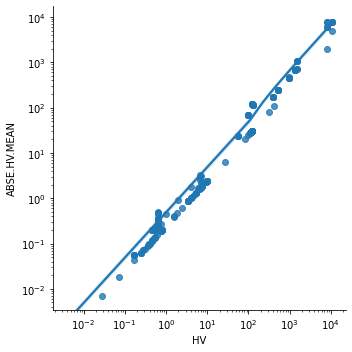

In [191]:
sns.lmplot(x="HV", y="ABSE.HV.MEAN", data=df)
plt.xscale("log")
plt.yscale("log")
plt.tight_layout()
plt.savefig("figures/correlation-HV-ABSE.HV.MEAN.pdf")

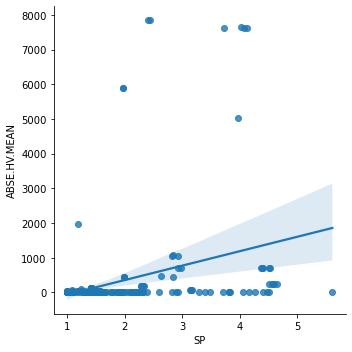

In [192]:
sns.lmplot(x="SP", y="ABSE.HV.MEAN", data=df)
plt.tight_layout()
plt.savefig("figures/correlation-SP-ABSE.HV.MEAN.pdf")

In [183]:
display(df.columns)
df[["ABSE.HV.MEAN","ABSE.CUM.HV.MEAN","ABSE.JF.CUM.HV.MEAN", "ABSE.JF.HV.MEAN"]]

Index(['Unnamed: 0', 'run', 'seed', 'HV', 'HVN', 'SP', 'ABSE.HV.MEAN',
       'ABSE.HV.AUC.MEAN', 'ABSE.HV.AUC.B1', 'ABSE.CUM.HV.MEAN',
       'ABSE.CUM.HV.AUC.MEAN', 'ABSE.CUM.HV.AUC.B1', 'ABSE.JF.HV.MEAN',
       'ABSE.JF.HV.AUC.MEAN', 'ABSE.JF.HV.AUC.B1', 'ABSE.JF.CUM.HV.MEAN',
       'ABSE.JF.CUM.HV.AUC.MEAN', 'ABSE.JF.CUM.HV.AUC.B1', 'solver',
       'instance', 'configuration'],
      dtype='object')

,ABSE.HV.MEAN,ABSE.CUM.HV.MEAN,ABSE.JF.CUM.HV.MEAN
0,0.195086,0.195086,0.195086
1,0.195373,0.195373,0.195373
2,0.195334,0.195334,0.195334
3,0.195329,0.195329,0.195329
4,0.195431,0.195431,0.195431
...,...,...,...
513,0.094048,0.094048,0.094048
514,0.081369,0.081369,0.081369
515,0.110912,0.110912,0.110912
516,0.103264,0.103264,0.103264


## Anomalies

In the following cases the hypervolume is 0. Need to investigate why that is and why ABSE.HV.AUC.B1 does have an value. Suspicion: ABSE does use different reference points

In [163]:
df[df["HV"] < df["ABSE.HV.MEAN"]]

,Unnamed: 0,run,seed,HV,HVN,SP,ABSE.HV.MEAN,ABSE.HV.AUC.MEAN,ABSE.HV.AUC.B1,ABSE.CUM.HV.MEAN,...,ABSE.CUM.HV.AUC.B1,ABSE.JF.HV.MEAN,ABSE.JF.HV.AUC.MEAN,ABSE.JF.HV.AUC.B1,ABSE.JF.CUM.HV.MEAN,ABSE.JF.CUM.HV.AUC.MEAN,ABSE.JF.CUM.HV.AUC.B1,solver,instance,configuration
102,102,1,43568,0.0,0.0,1.498579,30.250000,48087.002978,1.814734e+05,30.250000,...,1.814734e+05,30.250000,46711.226524,1.814734e+05,30.250000,48087.002978,1.814734e+05,omnioptimizer,ZDT4,NaN
103,103,2,42614,0.0,0.0,1.499448,28.876739,46055.298198,5.832490e+03,28.876739,...,5.832490e+03,28.876739,44781.604039,5.832490e+03,28.876739,46055.298198,5.832490e+03,omnioptimizer,ZDT4,NaN
112,112,1,43568,0.0,0.0,1.499402,28.875151,38981.593556,1.559264e+05,28.875151,...,1.559264e+05,28.875151,43266.826586,1.559264e+05,28.875151,38981.593556,1.559264e+05,omnioptimizer,DTLZ1,NaN
126,126,0,2733,0.0,0.0,1.065453,27.133591,568418.629576,2.273675e+06,27.133591,...,2.273675e+06,0.000000,0.000000,0.000000e+00,27.133591,568418.629576,2.273675e+06,MOLE,DTLZ2,NaN
127,127,1,43568,0.0,0.0,1.053025,27.429434,617547.211421,2.470189e+06,27.429434,...,2.470189e+06,0.000000,0.000000,0.000000e+00,27.429434,617547.211421,2.470189e+06,MOLE,DTLZ2,NaN
129,129,3,52417,0.0,0.0,1.049229,27.499990,683053.229099,2.732213e+06,27.499990,...,2.732213e+06,0.000000,0.000000,0.000000e+00,27.499990,683053.229099,2.732213e+06,MOLE,DTLZ2,NaN
166,166,0,2733,0.0,0.0,1.065453,27.133591,568418.629576,2.273675e+06,27.133591,...,2.273675e+06,0.000000,0.000000,0.000000e+00,27.133591,568418.629576,2.273675e+06,MOLE,DTLZ5,NaN
167,167,1,43568,0.0,0.0,1.053025,27.429434,617547.211421,2.470189e+06,27.429434,...,2.470189e+06,0.000000,0.000000,0.000000e+00,27.429434,617547.211421,2.470189e+06,MOLE,DTLZ5,NaN
169,169,3,52417,0.0,0.0,1.049229,27.499990,683053.229099,2.732213e+06,27.499990,...,2.732213e+06,0.000000,0.000000,0.000000e+00,27.499990,683053.229099,2.732213e+06,MOLE,DTLZ5,NaN
186,186,0,2733,0.0,0.0,1.499248,30.250000,45336.616100,1.813465e+05,30.250000,...,1.813465e+05,0.000000,0.000000,0.000000e+00,30.250000,45336.616100,1.813465e+05,omnioptimizer,DTLZ6,NaN


## Decs and Obj visuals

In [313]:
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

import rpy2.robjects.pandas2ri
rpy2.robjects.pandas2ri.activate()

In [317]:
print("Parse visualisations")
def load_rdata(filepath):
    data = robjects.r['load'](filepath)

    objnames = ["dec.space", "dims", "step.sizes", "obj.space", "efficientSets", "decSpaceLabels",
                "basin_separated_eval"]

    result = {}

    for i, objname in enumerate(data):
        obj = robjects.r[objname]
        objdict = {}
        for j, field in enumerate(obj):
            if j < 6:
                o = np.array(obj[j])
            else:
                o = pd.DataFrame(obj[j])
            objdict[objnames[j]] = o
        result[objname] = objdict

    return result


df = None
for file in tqdm(os.listdir("visualisation")[:10]):
    if file[-6:] != ".Rdata":
        continue
    instance, solver = file[:-6].split("_")
    #     print(f"{instance} - {solver}")

    data = load_rdata(os.path.join("visualisation", file))
    #     tdf = data["abse"]["basin_separated_eval"]
    for absetype in ["abse", "absec"]:
        tdf = data[absetype]["basin_separated_eval"]
        tdf["type"] = absetype
        tdf["instance"] = instance
        tdf["solver"] = solver

        if df is None:
            df = tdf
        else:
            df = pd.concat([df, tdf], ignore_index=True)
print(df)

Parse visualisations


  0%|          | 0/10 [00:00<?, ?it/s]

/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


      fun_calls  value_basin1  value_basin2  value_basin3  value_basin4  \
0           0.0      2.826018      3.585666           0.0           0.0   
1         100.0      2.704243      3.521333           0.0           0.0   
2         200.0      2.507636      3.532553           0.0           0.0   
3         300.0      2.497296      3.621937           0.0           0.0   
4         400.0      2.410496      3.657849           0.0           0.0   
...         ...           ...           ...           ...           ...   
4989    24500.0      3.918799      2.835028           0.0           0.0   
4990    24600.0      3.918799      2.835028           0.0           0.0   
4991    24700.0      3.918799      2.835028           0.0           0.0   
4992    24800.0      3.918799      2.835028           0.0           0.0   
4993    24900.0      3.918799      2.835028           0.0           0.0   

      mean_value   auc_hv_mean       auc_hv1   type instance         solver  
0       1.602921     

In [324]:
df = pd.read_csv("./abse_tables.csv")
df.head(5)

,Unnamed: 0,fun_calls,value_basin1,value_basin2,value_basin3,value_basin4,mean_value,auc_hv_mean,auc_hv1,type,instance,solver
0,0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abse,MMF6,MOLE
1,1,200.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abse,MMF6,MOLE
2,2,300.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abse,MMF6,MOLE
3,3,400.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abse,MMF6,MOLE
4,4,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,abse,MMF6,MOLE


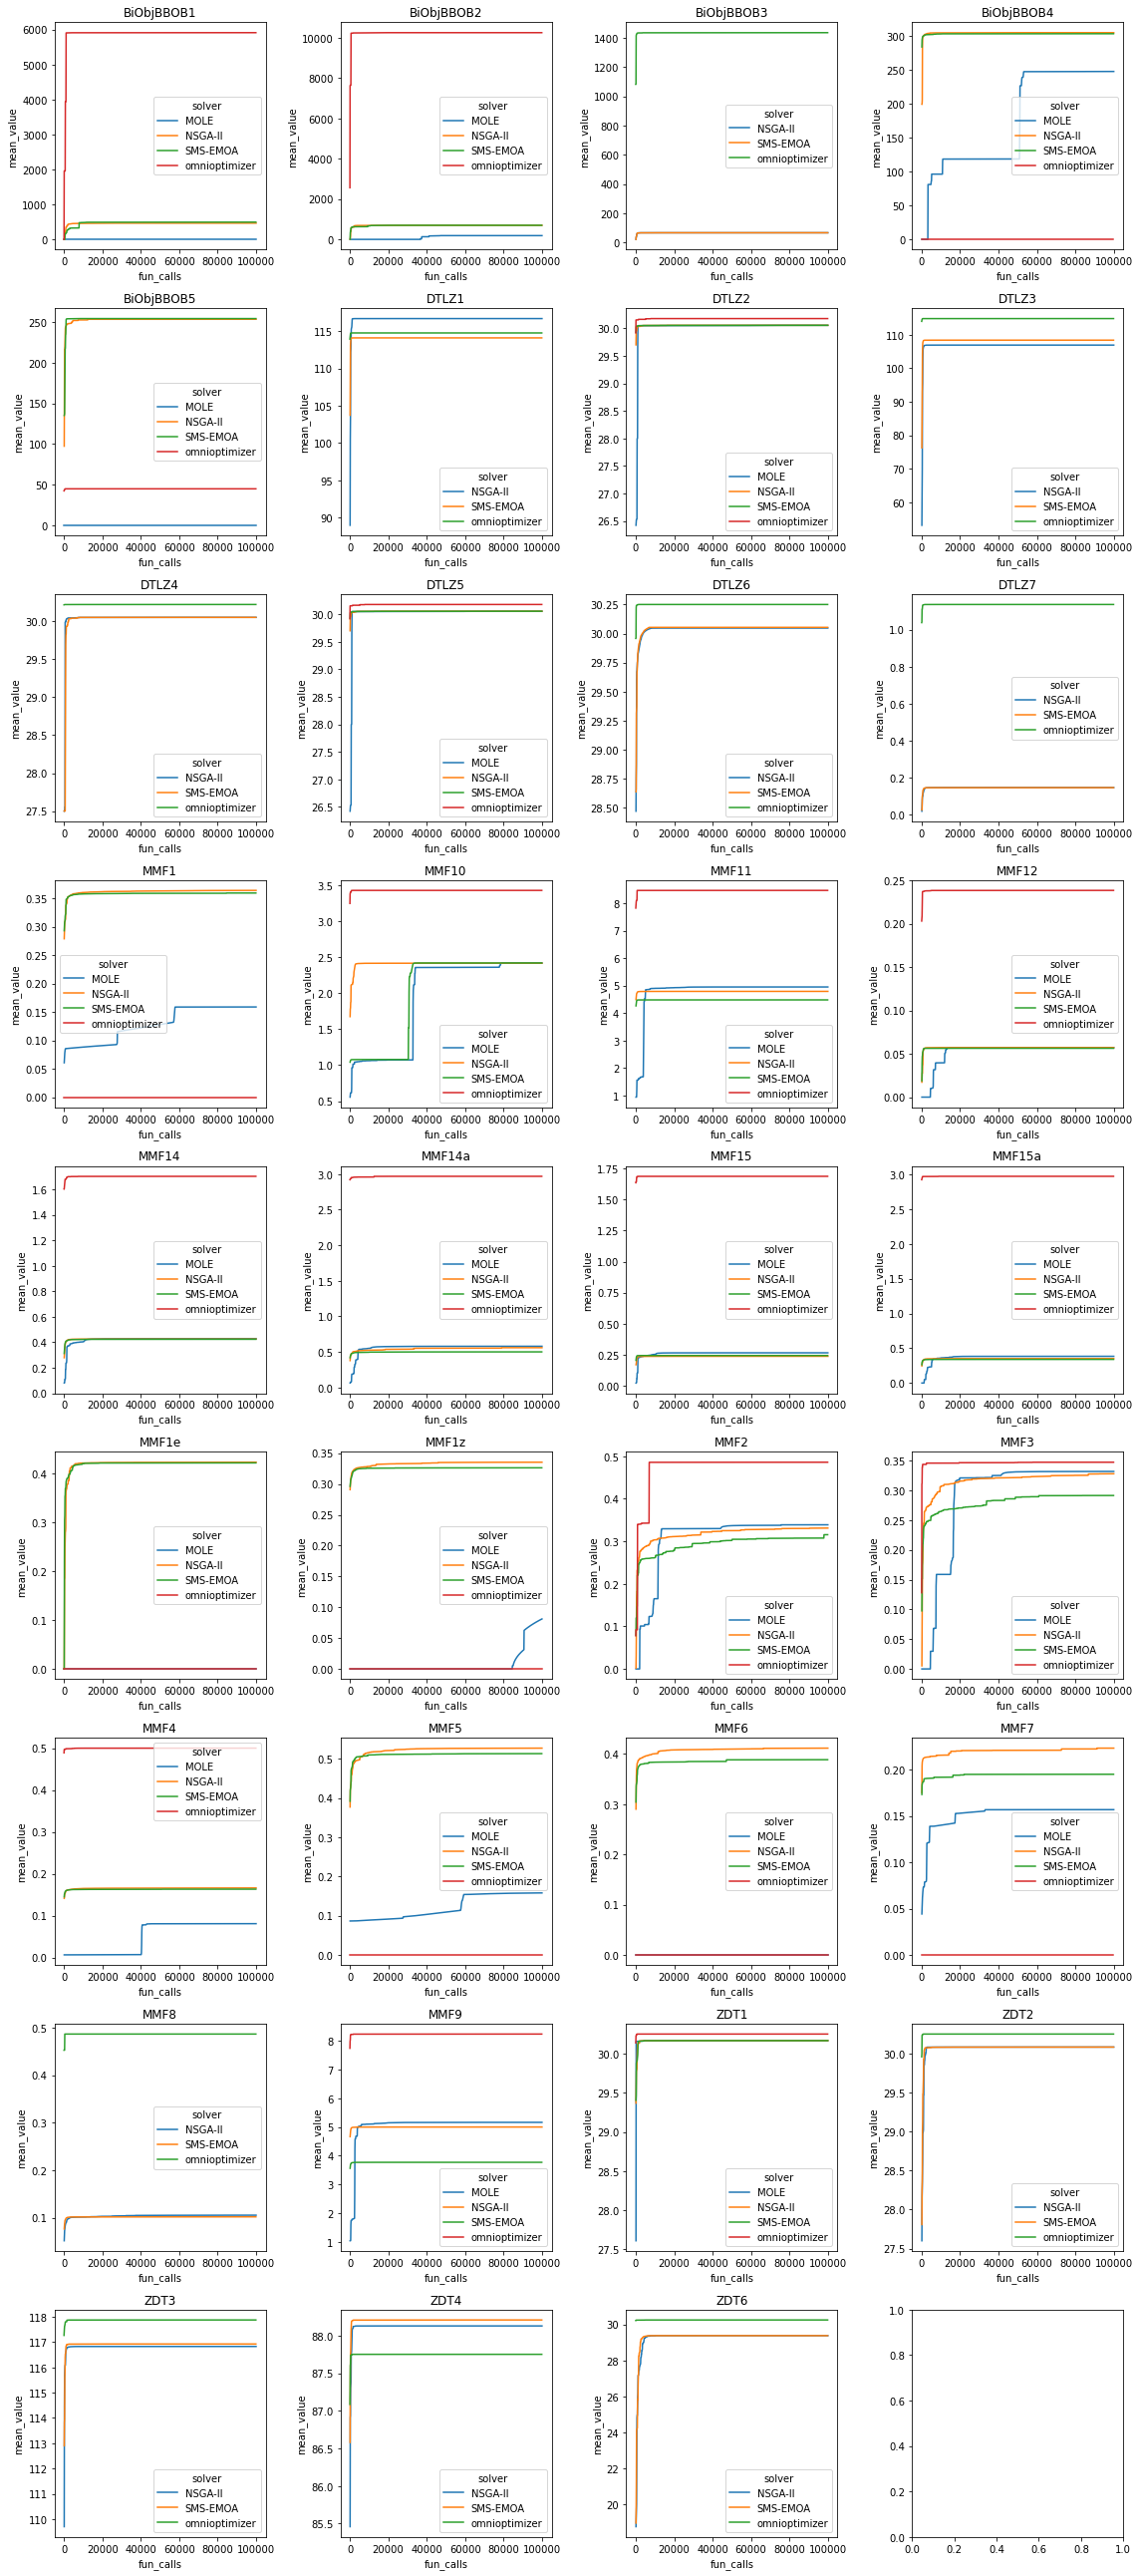

In [326]:
width = 4
height = int(np.ceil(len(df["instance"].unique())/width))

fix, axs = plt.subplots(height, width, figsize=(4*width, 4*height))

for figid, (instance, gdf) in enumerate(df[df["type"]=="absec"].sort_values("instance").groupby("instance")):
    gdf = gdf.sort_values("solver")
    #print(f"{figid}, {instance}")
    i = figid // width
    j = figid % width
    ax = axs[i][j]
    sns.lineplot(x="fun_calls", y="mean_value", hue="solver", ci=None, data=gdf, ax=ax)
    ax.set_title(instance)

fig.suptitle("ABSE cummulative mean per instance")
plt.tight_layout()
plt.savefig("figures/abse_mean_cum_per_instance.pdf")
plt.show()

In [296]:
df.groupby("solver")["fun_calls"].max()

solver
MOLE             25000.0
NSGA-II          25000.0
SMS-EMOA         24900.0
omnioptimizer    24900.0
Name: fun_calls, dtype: float64

In [76]:
data = pyreadr.read_r("test.RDS")
data

OrderedDict()

In [95]:
300**2

90000

In [398]:
result = load_rdata("visualisation/MMF10_NSGA-II.Rdata")
print(result["abse"]["decSpaceLabels"])

for label in np.unique(result["abse"]["decSpaceLabels"]):
    print(label, np.count_nonzero(result["abse"]["decSpaceLabels"] == label))
result["abse"].keys()

[-1.  1.  1. ...  2.  2.  2.]
-1.0 293
1.0 10169
2.0 79538


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


dict_keys(['dec.space', 'dims', 'step.sizes', 'obj.space', 'efficientSets', 'decSpaceLabels', 'basin_separated_eval'])

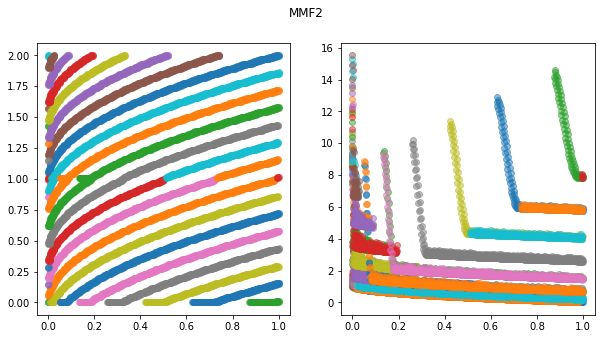

In [381]:
fig, (decplt, objplt) = plt.subplots(1,2, figsize=(10,5))
for efficient_set in result["abse"]["efficientSets"]:
    dec = np.array([result["abse"]["dec.space"][int(point-1),:] for point in efficient_set])
    decplt.scatter(*dec.T, alpha=0.5)
    obj = np.array([result["abse"]["obj.space"][int(point-1),:] for point in efficient_set])
    objplt.scatter(*obj.T, alpha=0.5)
fig.suptitle("MMF2")
plt.show()

BiObjBBOB1
Efficient sets: 806


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


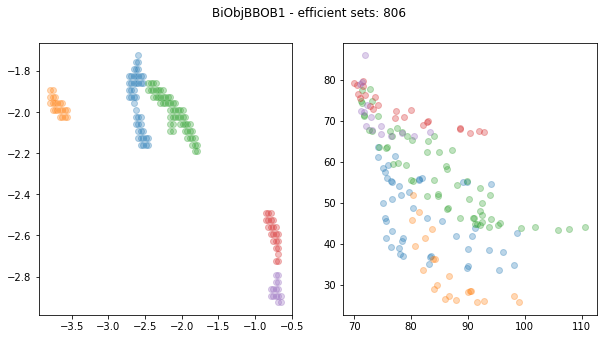

BiObjBBOB2
Efficient sets: 670


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


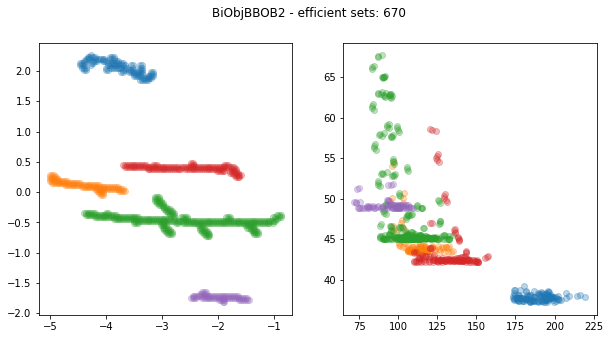

BiObjBBOB3
Efficient sets: 519


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


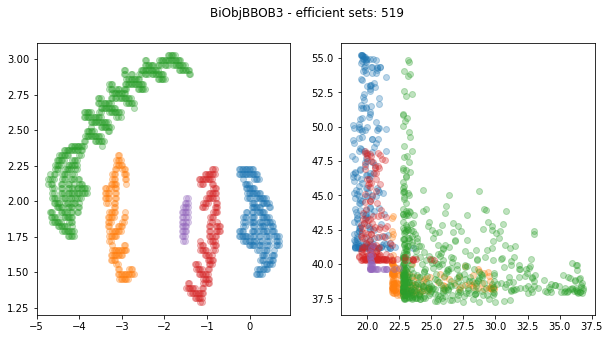

BiObjBBOB4
Efficient sets: 53


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


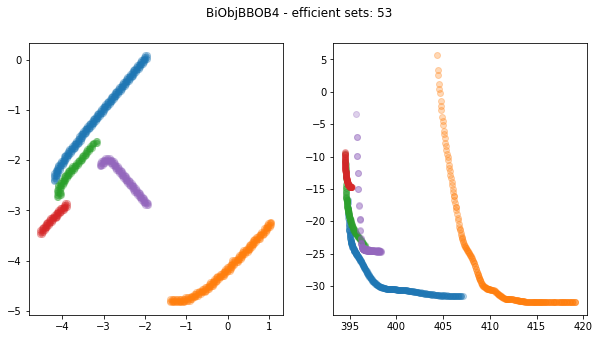

BiObjBBOB5
Efficient sets: 156


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


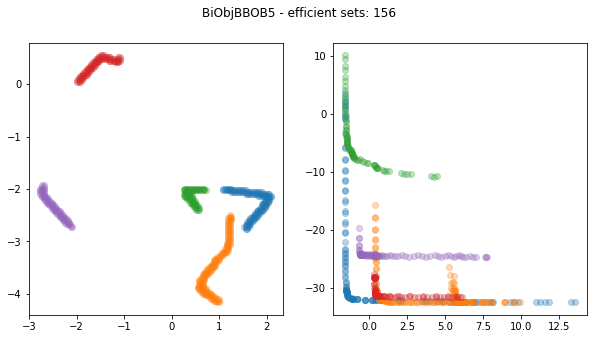

DTLZ1


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


Efficient sets: 11


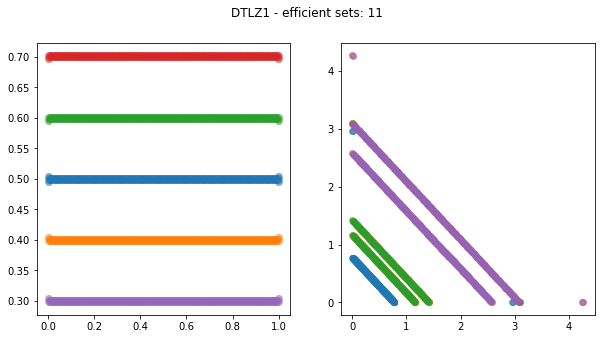

DTLZ2
Efficient sets: 1


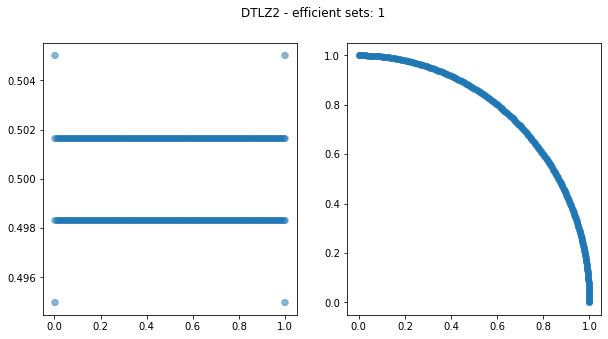

DTLZ3


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


Efficient sets: 11


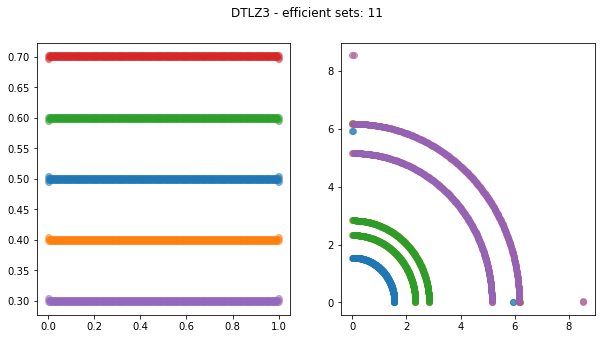

DTLZ4
Efficient sets: 1


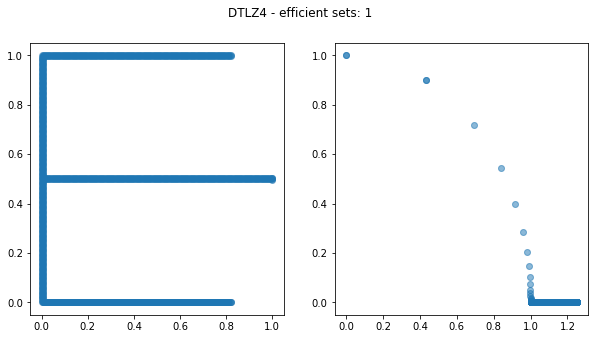

DTLZ5
Efficient sets: 1


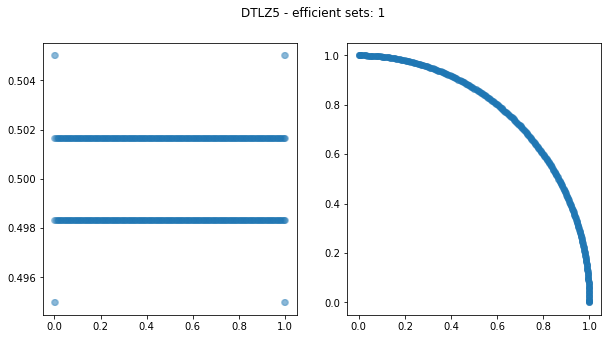

DTLZ6
Efficient sets: 1


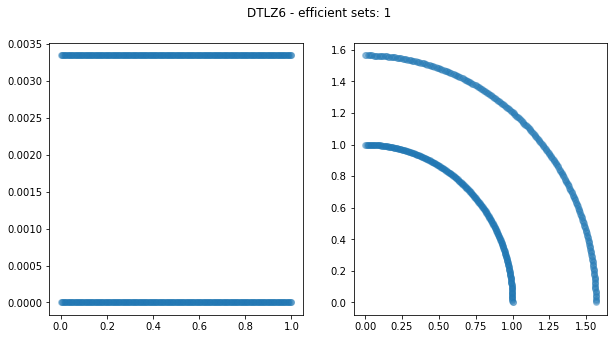

DTLZ7
Efficient sets: 2


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


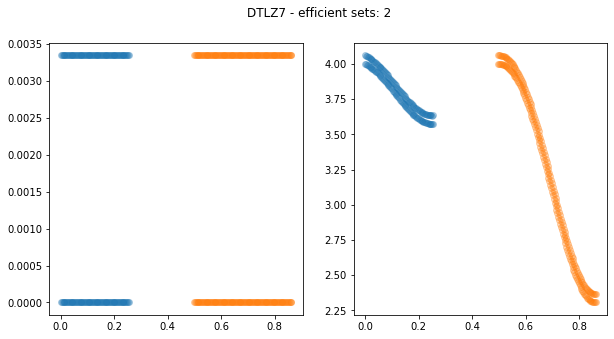

MMF1


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


Efficient sets: 3


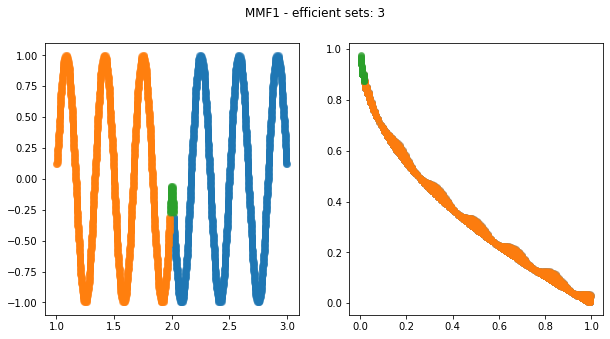

MMF10


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


Efficient sets: 2


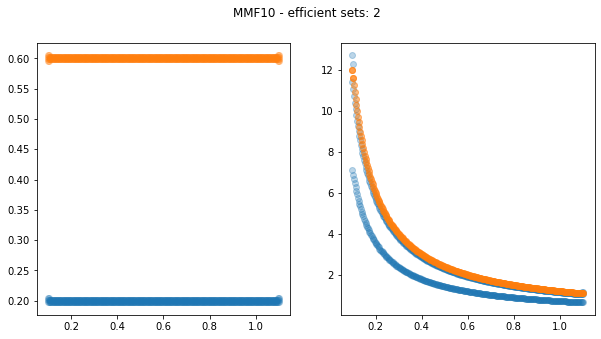

MMF11
Efficient sets: 5


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


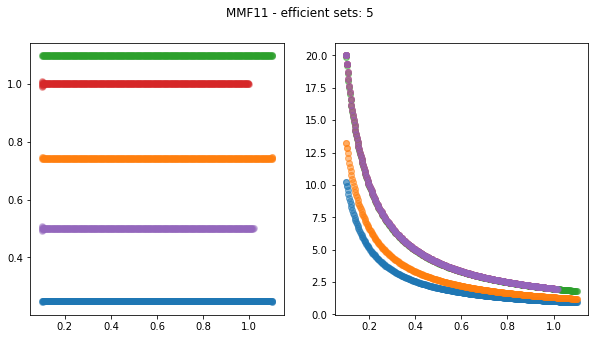

MMF12
Efficient sets: 31


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


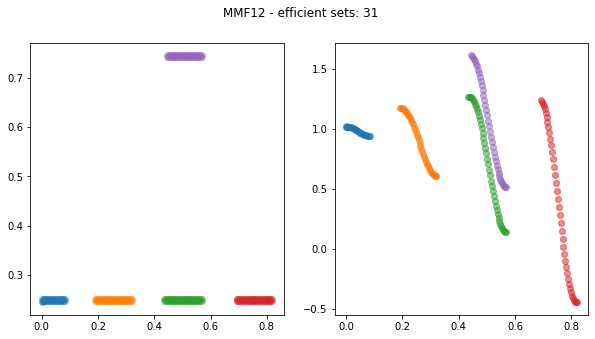

MMF14
Efficient sets: 2


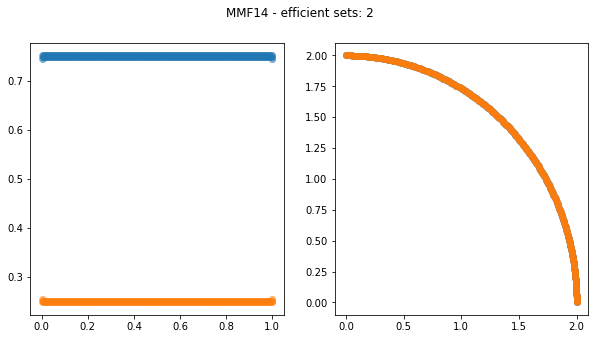

MMF14a
Efficient sets: 5


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


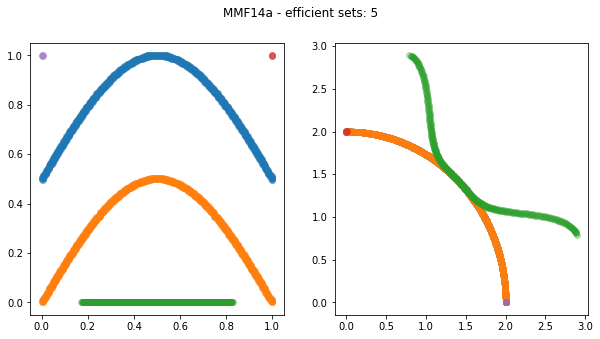

MMF15
Efficient sets: 2


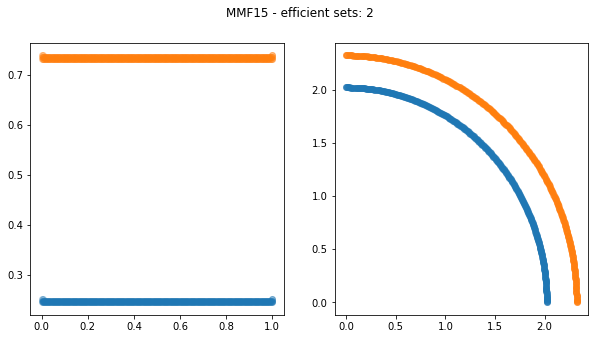

MMF15a
Efficient sets: 7


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


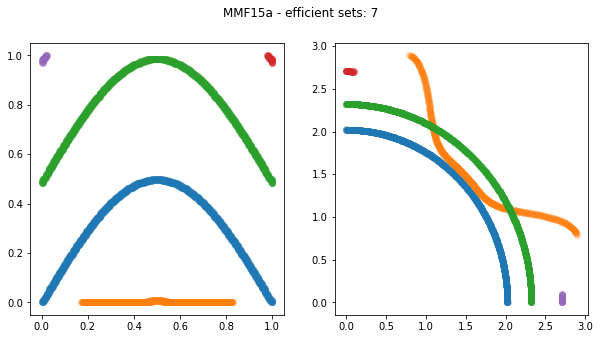

MMF1e
Efficient sets: 14


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


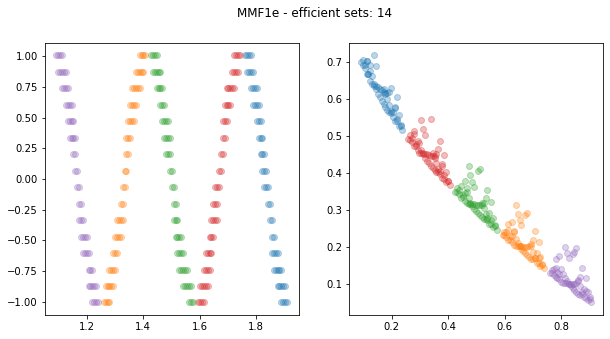

MMF1z
Efficient sets: 3


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


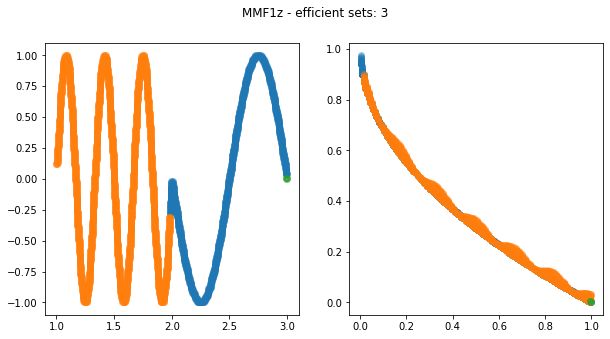

MMF2
Efficient sets: 34


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


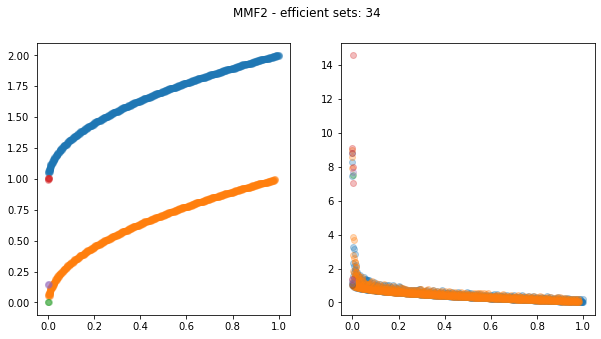

MMF3
Efficient sets: 36


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


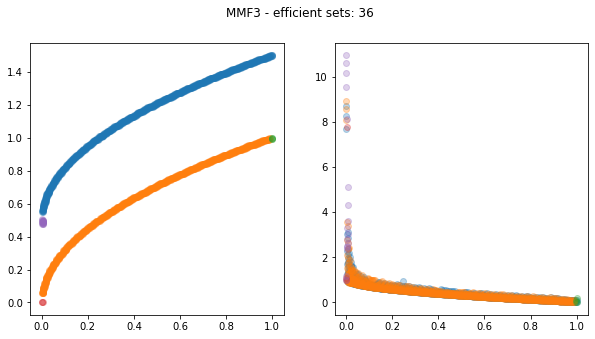

MMF4
Efficient sets: 2


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


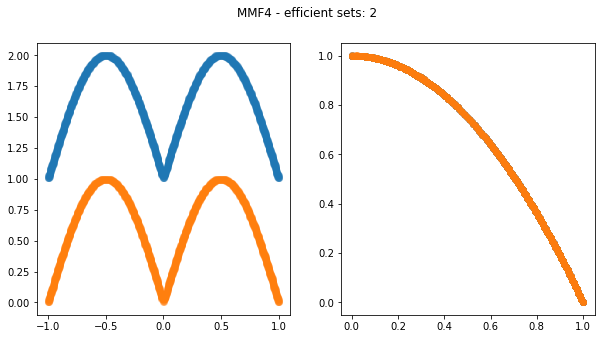

MMF5
Efficient sets: 5


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


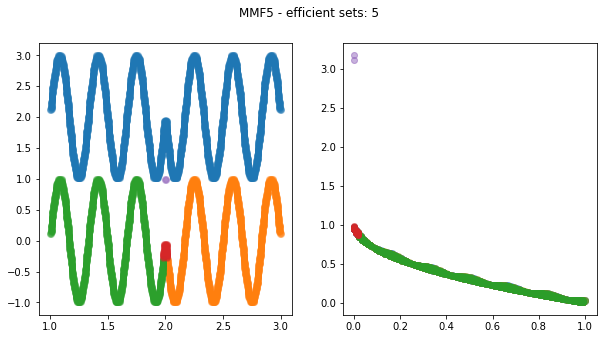

MMF6
Efficient sets: 14


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


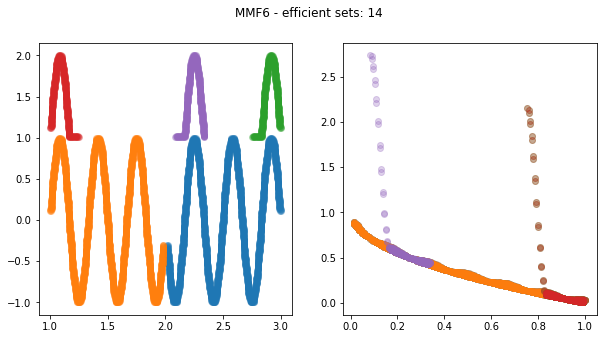

MMF7
Efficient sets: 9


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


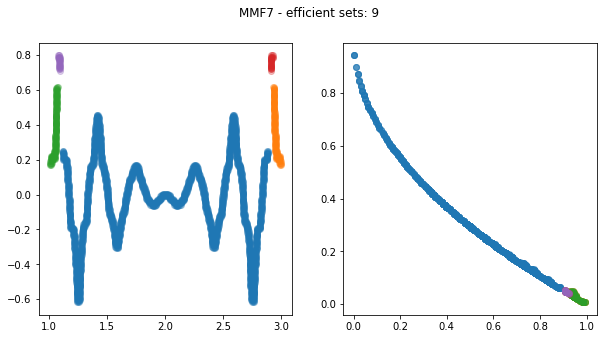

MMF8
Efficient sets: 2


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


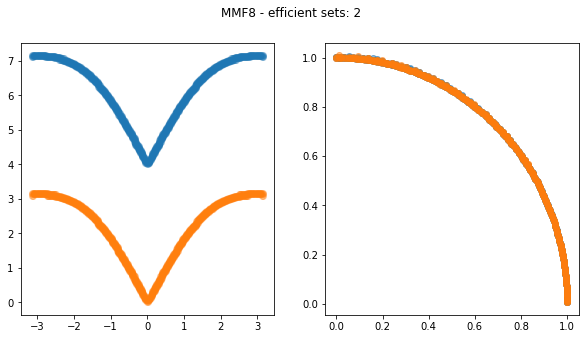

MMF9
Efficient sets: 5


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


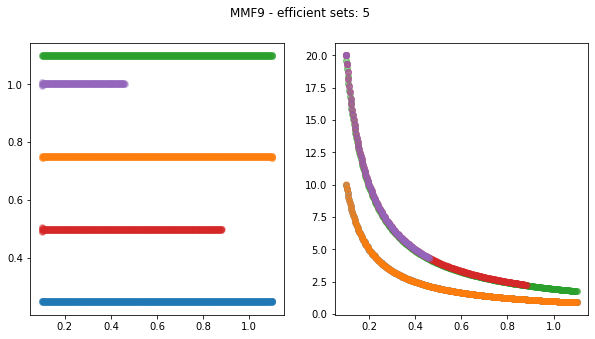

ZDT1
Efficient sets: 1


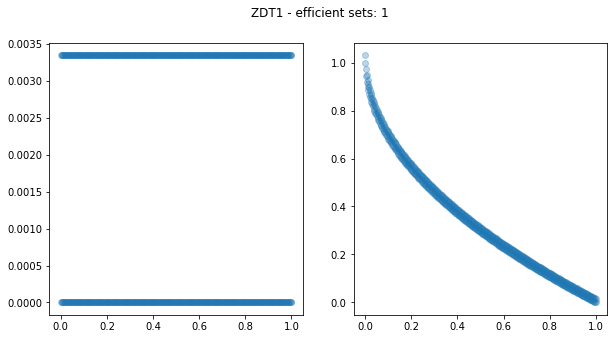

ZDT2
Efficient sets: 1


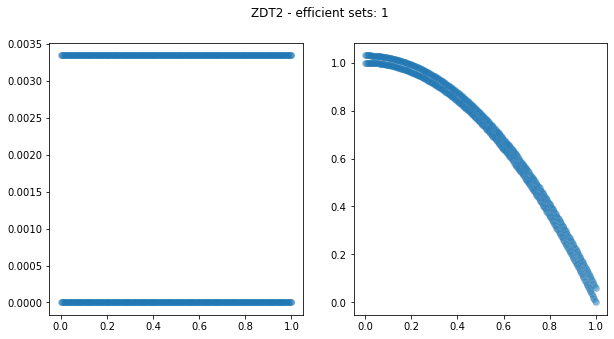

ZDT3
Efficient sets: 6


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


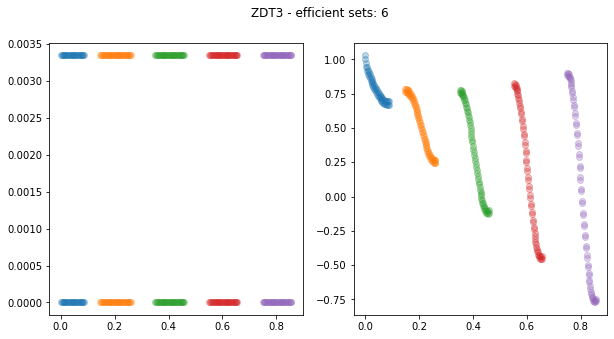

ZDT4
Efficient sets: 3


/var/folders/b8/41_wfv893tnc356wksp2vkvw0000gn/T/ipykernel_58945/3013802758.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  o = np.array(obj[j])


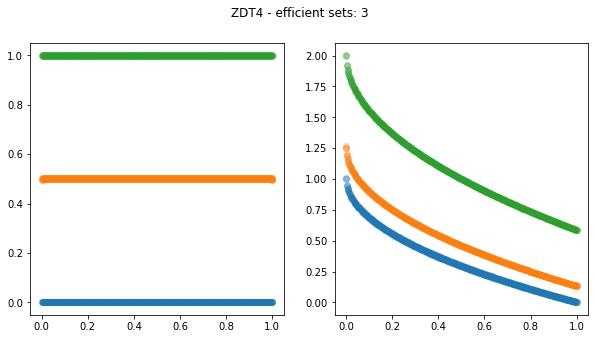

ZDT6
Efficient sets: 1


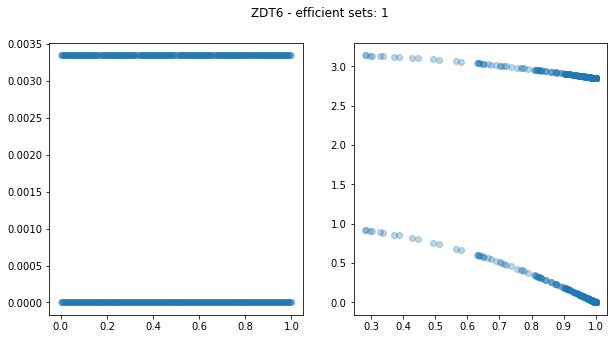

In [400]:
for instance in df["instance"].unique():
    print(instance)
    result = load_rdata(f"visualisation/{instance}_NSGA-II.Rdata")
    
    print("Efficient sets: {}".format(len(result["abse"]["efficientSets"])))
    #for label in np.unique(result["abse"]["decSpaceLabels"]):
    #    print(label, np.count_nonzero(result["abse"]["decSpaceLabels"] == label))
    
    fig, (decplt, objplt) = plt.subplots(1,2, figsize=(10,5))
    for efficient_set in result["abse"]["efficientSets"][:5]:
        dec = np.array([result["abse"]["dec.space"][int(point-1),:] for point in efficient_set])
        decplt.scatter(*dec.T, alpha=0.3)
        obj = np.array([result["abse"]["obj.space"][int(point-1),:] for point in efficient_set])
        objplt.scatter(*obj.T, alpha=0.3)
    fig.suptitle(instance + " - efficient sets: {}".format(len(result["abse"]["efficientSets"])))
    plt.savefig(f"figures/efficientsets/{instance}.pdf")
    plt.show()